### One Hot Encoding

In [1]:
import pandas as pd
import numpy as np

In [15]:
Text = "I am teaching NLP in Python"
pd.get_dummies(Text.split()) 

,I,NLP,Python,am,in,teaching
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,0,1,0,0,0,0
4,0,0,0,0,1,0
5,0,0,1,0,0,0


In [37]:
Text = "I am teaching NLP in Python.Students are learning NLP in python."
pd.get_dummies(Text.split()) 

,I,NLP,Python.,Students,am,are,in,learning,python.,teaching
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0
5,0,0,1,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0
9,0,1,0,0,0,0,0,0,0,0


In [55]:
import re
lst=re.findall(r'\w+', Text)
lst

['I',
 'am',
 'teaching',
 'NLP',
 'in',
 'Python',
 'Students',
 'are',
 'learning',
 'NLP',
 'in',
 'python']

In [58]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[9, :])])
print(inverted)

inverted = label_encoder.inverse_transform([argmax(onehot_encoded[5, :])])
print(inverted)

[0 4 9 1 6 2 3 5 7 1 6 8]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
['NLP']
['Python']


In [60]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical

# define example
data = [1, 3, 2, 0, 3, 2, 2, 1, 0, 1]
data = array(data)
print(data)

# one hot encode
encoded = to_categorical(data)
print(encoded)

# invert encoding
inverted = argmax(encoded[0])
print(inverted)

[1 3 2 0 3 2 2 1 0 1]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
1


In [63]:
# define example
data = ["Small" , "Small" , "Large" , "Small" , "XL" , "XL" , "Large" , "Small" , "Large" , "XL" ]
values = array(data)
print(values)

['Small' 'Small' 'Large' 'Small' 'XL' 'XL' 'Large' 'Small' 'Large' 'XL']


In [64]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

[1 1 0 1 2 2 0 1 0 2]


In [65]:
inverse=label_encoder.inverse_transform(integer_encoded)
inverse

array(['Small', 'Small', 'Large', 'Small', 'XL', 'XL', 'Large', 'Small',
       'Large', 'XL'], dtype='<U5')

In [66]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
print(integer_encoded)

[[1]
 [1]
 [0]
 [1]
 [2]
 [2]
 [0]
 [1]
 [0]
 [2]]


In [67]:
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


### Bag-of-Words- Count Vectorizer

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
documemts = ['This is the first document.','This document is the second document.',
             'And this is the third one.','In this way there are so many documents.']

In [85]:
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(documemts)

In [86]:
# Printing the identified Unique words along with their indices
print("Vocabulary with index : ", vectorizer.vocabulary_)
print("Sorted Vocabulary: ",sorted(vectorizer.vocabulary_.keys()))

Vocabulary with index :  {'this': 14, 'is': 6, 'the': 11, 'first': 4, 'document': 2, 'second': 9, 'and': 0, 'third': 13, 'one': 8, 'in': 5, 'way': 15, 'there': 12, 'are': 1, 'so': 10, 'many': 7, 'documents': 3}
Sorted Vocabulary:  ['and', 'are', 'document', 'documents', 'first', 'in', 'is', 'many', 'one', 'second', 'so', 'the', 'there', 'third', 'this', 'way']


In [87]:
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(features.toarray())

Encoded Document is:
[[0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0]
 [0 0 2 0 0 0 1 0 0 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1]]


In [88]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
vectorizer = CountVectorizer(stop_words=stop_words)
features = vectorizer.fit_transform(documemts)
# Printing the identified Unique words along with their indices
print("Vocabulary with index : ", vectorizer.vocabulary_)
print("Sorted Vocabulary: ",sorted(vectorizer.vocabulary_.keys()))
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(features.toarray())

Vocabulary with index :  {'first': 2, 'document': 0, 'second': 5, 'third': 6, 'one': 4, 'way': 7, 'many': 3, 'documents': 1}
Sorted Vocabulary:  ['document', 'documents', 'first', 'many', 'one', 'second', 'third', 'way']
Encoded Document is:
[[1 0 1 0 0 0 0 0]
 [2 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 1 0]
 [0 1 0 1 0 0 0 1]]


In [90]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
features2 = vectorizer2.fit_transform(documemts)
print("Vocabulary: ", vectorizer2.vocabulary_)
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(features2.toarray())

Vocabulary:  {'this is': 15, 'is the': 5, 'the first': 9, 'first document': 3, 'this document': 14, 'document is': 2, 'the second': 10, 'second document': 7, 'and this': 0, 'the third': 11, 'third one': 13, 'in this': 4, 'this way': 16, 'way there': 17, 'there are': 12, 'are so': 1, 'so many': 8, 'many documents': 6}
Encoded Document is:
[[0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0]
 [0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1]]


### Term Frequency–Inverse Document Frequency

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [97]:
documents=["This pasta is very tasty and affordable.",
          "This pasta is not tasty and is affordable.",
          "This pasta is very very delicious."]

In [102]:
tfidf = TfidfVectorizer()
tfidfvectors = tfidf.fit_transform(documents)
features_names=tfidf.get_feature_names()
print(f"Features Names:  {features_names}")

Features Names:  ['affordable', 'and', 'delicious', 'is', 'not', 'pasta', 'tasty', 'this', 'very']


In [103]:
matrix=tfidfvectors.todense()
denselist=matrix.tolist()
df=pd.DataFrame(denselist,columns=features_names)
print(f"The Final TF-IDF matrix : \n {df}")

The Final TF-IDF matrix : 
    affordable       and  delicious        is       not     pasta     tasty  \
0    0.414896  0.414896   0.000000  0.322204  0.000000  0.322204  0.414896   
1    0.346117  0.346117   0.000000  0.537582  0.455102  0.268791  0.346117   
2    0.000000  0.000000   0.478909  0.282851  0.000000  0.282851  0.000000   

       this      very  
0  0.322204  0.414896  
1  0.268791  0.000000  
2  0.282851  0.728445  


In [104]:
df = pd.DataFrame(tfidfvectors[0].T.todense(),index=features_names, columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
df

,TF-IDF
affordable,0.414896
and,0.414896
tasty,0.414896
very,0.414896
is,0.322204
pasta,0.322204
this,0.322204
delicious,0.000000
not,0.000000


In [105]:
df = pd.DataFrame(tfidfvectors[1].T.todense(),index=features_names, columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
df

,TF-IDF
is,0.537582
not,0.455102
affordable,0.346117
and,0.346117
tasty,0.346117
pasta,0.268791
this,0.268791
delicious,0.000000
very,0.000000


### Word Embedding using Word2Vec

In [2]:
#pip install gensim

In [7]:
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [8]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [49]:
#  Reads ‘DL.txt’ file
with open("data/DL.txt", "r",encoding="utf-8") as f:
    sent = f.read()
#sent

In [50]:
text=sent_tokenize(sent)
print(f"Number of sentences : {len(text)}")
print(f"ninth sentence from file: {text[9]}")

Number of sentences : 91
ninth sentence from file: Word2vec is basically a word embedding technique that is used to convert the words in the dataset to vectors so that the machine understands.


In [51]:
print(f"print ninth sentence from file Before removing punctuations : {text[9]}")

for i in range(len(text)):
    text[i]=re.sub("[^a-zA-Z]"," ",str(text[i]))


print(f"print ninth sentence from file after removing punctuations : {text[9]}")

print ninth sentence from file Before removing punctuations : Word2vec is basically a word embedding technique that is used to convert the words in the dataset to vectors so that the machine understands.
print ninth sentence from file after removing punctuations : Word vec is basically a word embedding technique that is used to convert the words in the dataset to vectors so that the machine understands 


In [52]:
# word tokinize
word_tokenizer=[]
for w in text:
    wt=word_tokenize(w)
    word_tokenizer.append(wt)
    
print(f"tenth sentences word tokenizer  : {word_tokenizer[0]}")   

tenth sentences word tokenizer  : ['This', 'model', 'was', 'created', 'by', 'Google', 'in', 'and', 'is', 'a', 'predictive', 'deep', 'learning', 'based', 'model', 'to', 'compute', 'and', 'generate', 'high', 'quality', 'distributed', 'and', 'continuous', 'dense', 'vector', 'representations', 'of', 'words', 'which', 'capture', 'contextual', 'and', 'semantic', 'similarity']


In [53]:
import multiprocessing
cores = multiprocessing.cpu_count()
cores

8

In [54]:
# Create CBOW model
cbowModel=Word2Vec(sentences=word_tokenizer,
                  min_count=2, # minimum count of words to be consider. Default=5
                  vector_size = 10,# Number of dimension. Default=100
                  window=2,# default=5
                  sg=0, # method 0 for CBOW and 1 for Skip gram
                  alpha=0.03 # learning rate. Default=0.01
                  )

In [55]:
# total vocabulary words for word2vec model
words_cbow=list(cbowModel.wv.index_to_key)
print(f"Total Number of words {len(words_cbow)}")

Total Number of words 258


In [57]:
# get word embedding value for a particular word
print(cbowModel.wv.__getitem__('created'))

[ 0.08119776  0.05746394  0.00787126 -0.03519252 -0.07042691  0.04991765
  0.0249572  -0.02097496  0.07003935 -0.04347819]


In [63]:
# Print results
similars = cbowModel.wv.most_similar('learning',topn=3)
print(similars)

[('quick', 0.8098419904708862), ('programmer', 0.7270682454109192), ('AI', 0.7172524929046631)]


In [67]:
# similarity between two words
cbowModel.wv.similarity('deep', 'learning')

0.43788293

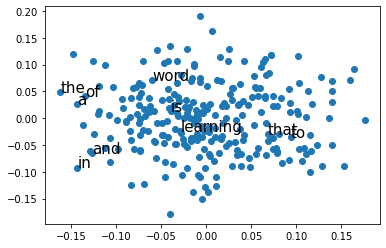

In [80]:
X=cbowModel.wv.__getitem__(cbowModel.wv.index_to_key)
# create 2D model using PCA
pcaModel=PCA(n_components=2)
model=pcaModel.fit_transform(X)

# Visualize the model
plt.scatter(model[:,0],model[:,1])
cbow=list(cbowModel.wv.index_to_key)

for i, word in enumerate(cbow[:10]):
    plt.annotate(s=word,xy=(model[i,0],model[i,1]),size=15)
plt.show()

### Building word2vec skip-gram method

In [81]:
#  Reads ‘DL.txt’ file
with open("data/DL.txt", "r",encoding="utf-8") as f:
    sent = f.read()
#sent
text=sent_tokenize(sent)
for i in range(len(text)):
    text[i]=re.sub("[^a-zA-Z]"," ",str(text[i]))

# word tokinize
word_tokenizer=[]
for w in text:
    wt=word_tokenize(w)
    word_tokenizer.append(wt)

# Create skip-gram model
skipgramModel=Word2Vec(sentences=word_tokenizer,
                  min_count=2, # minimum count of words to be consider. Default=5
                  vector_size = 10,# Number of dimension. Default=100
                  window=2,# default=5
                  sg=1, # method 0 for CBOW and 1 for Skip gram
                  alpha=0.03 # learning rate. Default=0.01
                  )

# total vocabulary words for word2vec model
words_sgram=list(skipgramModel.wv.index_to_key)
print(f"Total Number of words {len(words_sgram)}")

# get word embedding value for a particular word
print(cbowModel.wv.__getitem__('created'))

# Print results
similars = cbowModel.wv.most_similar('learning',topn=3)
print(similars)

# similarity between two words
cbowModel.wv.similarity('deep', 'learning')

Total Number of words 258
[ 0.08119776  0.05746394  0.00787126 -0.03519252 -0.07042691  0.04991765
  0.0249572  -0.02097496  0.07003935 -0.04347819]
[('quick', 0.8098419904708862), ('programmer', 0.7270682454109192), ('AI', 0.7172524929046631)]


0.43788293

### Word embedding model using Pre-trained models